#### Name: Godfrey Jeremiah

### Student ID: 23310758

### Import Module

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

### Task 1: Exploratory Data Analysis (EDA)

Open a new Jupyter notebook and name it etivity1.ipynb. In this notebook, perform EDA of the bank dataset by following the notebook Tutorial 1-1 - Exploratory Data Analysis.ipynb as an example.).

- Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).
- Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
- Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
- 
Make sure your conclusions are related to the question you have formulated.


### Solution

#### A. Explore the dataset

#### i. The Question:
Can we predict whether a client will subscribe to the service based on their demographic and financial characteristics, as well as their interactions with previous marketing campaigns?

This question delves into the predictive modeling aspect of the dataset, aiming to understand the factors that influence a client's decision to subscribe to the service. By analyzing demographic attributes (such as age, job, marital status, education), financial indicators (such as account balance, loan status), and previous marketing interactions (such as duration of contact, number of previous contacts, outcome of previous campaigns), we can build a predictive model to identify patterns and predict subscription behavior. This can be valuable for targeted marketing strategies and improving campaign effectiveness.


In [172]:
data = pd.read_csv('./bank.csv')
# Print first 5 rows of the dataframe
data.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

#### ii. Calculate statistics for the numerical and categorical attributes. Draw a short conclusion

In [173]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Calculate statistics for numerical attributes
numerical_stats = data[numerical_cols].describe()

# Calculate frequency distributions for categorical attributes
categorical_stats = {}
for col in categorical_cols:
    categorical_stats[col] = data[col].value_counts()

# Print statistical summary for all numerical attributes
print("Numerical Attributes Statistics:")
print(numerical_stats)

Numerical Attributes Statistics:
               age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000 

In [174]:
print("\nCategorical Attributes Frequency Distributions:")
for col, freq_dist in categorical_stats.items():
    print(f"\n{col}:\n{freq_dist}")


Categorical Attributes Frequency Distributions:

job:
job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

marital:
marital
married     1111
single       674
divorced     215
Name: count, dtype: int64

education:
education
secondary    995
tertiary     684
primary      217
Name: count, dtype: int64

default:
default
no     1985
yes      15
Name: count, dtype: int64

housing:
housing
no     1037
yes     963
Name: count, dtype: int64

loan:
loan
no     1750
yes     250
Name: count, dtype: int64

contact:
contact
cellular     1663
telephone     146
Name: count, dtype: int64

month:
month
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: count, dtype: int64

poutcome:
poutcome
failure    955
succe

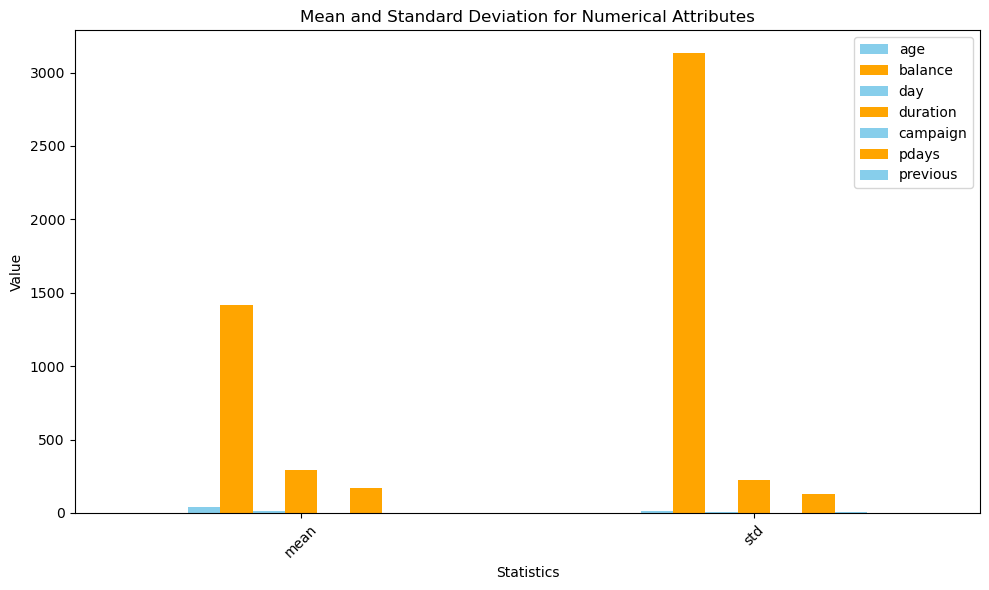

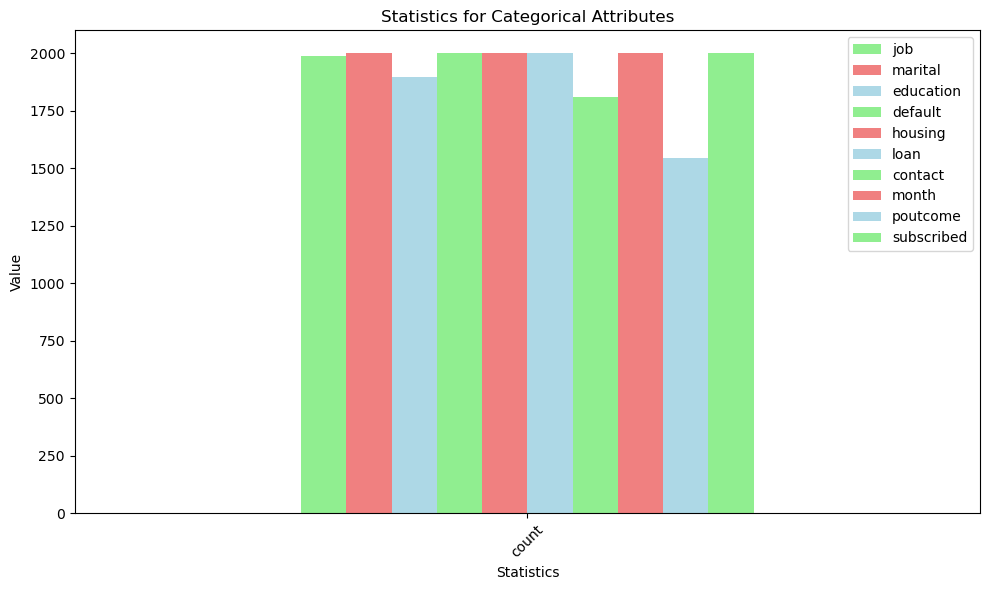

In [175]:
# Calculate statistics for numerical attributes
numerical_stats = data.describe()

# Calculate statistics for categorical attributes
categorical_stats = data.describe(include=['object'])

#Create plots to visualize statistics

# Plot for numerical attributes
plt.figure(figsize=(10, 6))
numerical_stats.loc[['mean', 'std']].plot(kind='bar', ax=plt.gca(), color=['skyblue', 'orange'])
plt.title('Mean and Standard Deviation for Numerical Attributes')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot for categorical attributes
# Exclude non-numeric statistics from categorical_stats DataFrame
categorical_stats_numeric = categorical_stats.drop(['unique', 'top', 'freq'])

plt.figure(figsize=(10, 6))
categorical_stats_numeric.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Statistics for Categorical Attributes')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The first plot visualizes the mean and standard deviation for numerical attributes. It helps identify the central tendency and variability of features like age, balance, etc. 

The second plot illustrates statistics like count, mean, and standard deviation for categorical attributes, offering insights into the distribution and variability of non-numeric features such as job, marital status, etc. These plots aid in understanding the dataset's overall characteristics, assisting in feature selection and potential data preprocessing steps.

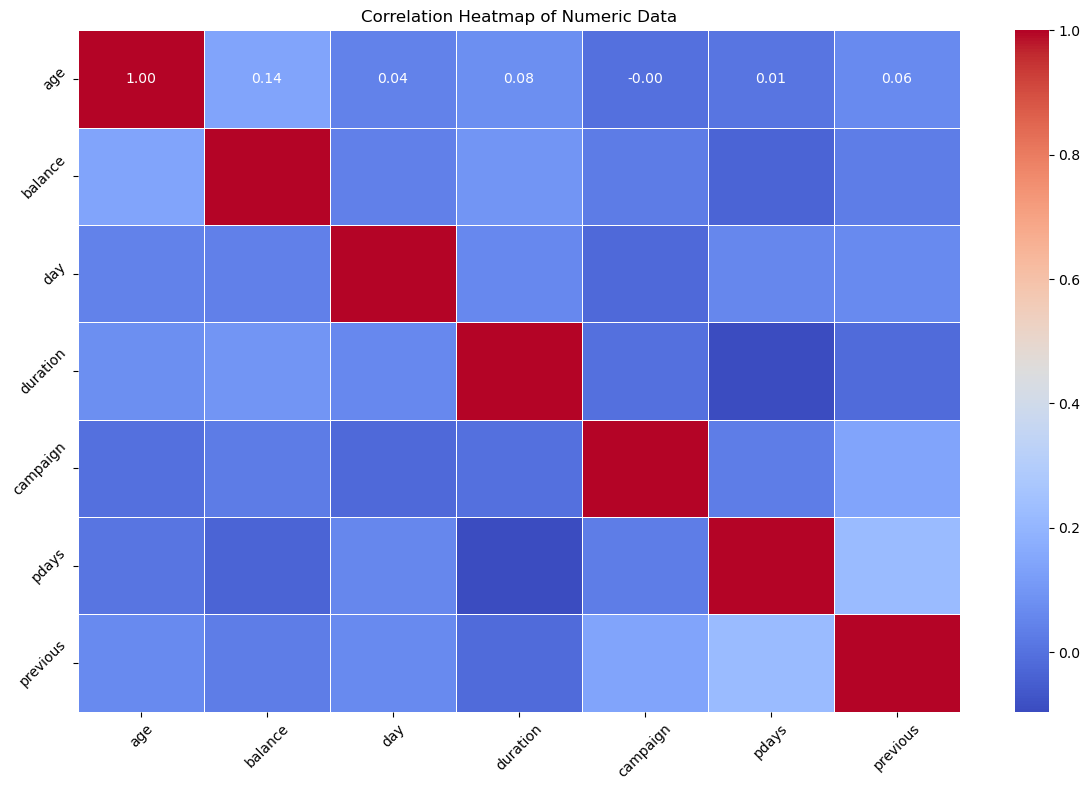

In [176]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Data')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Positive correlations will be represented by warmer colors (towards red), while negative correlations will be represented by cooler colors (towards blue). The annotations in the cells will show the correlation coefficients.

C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


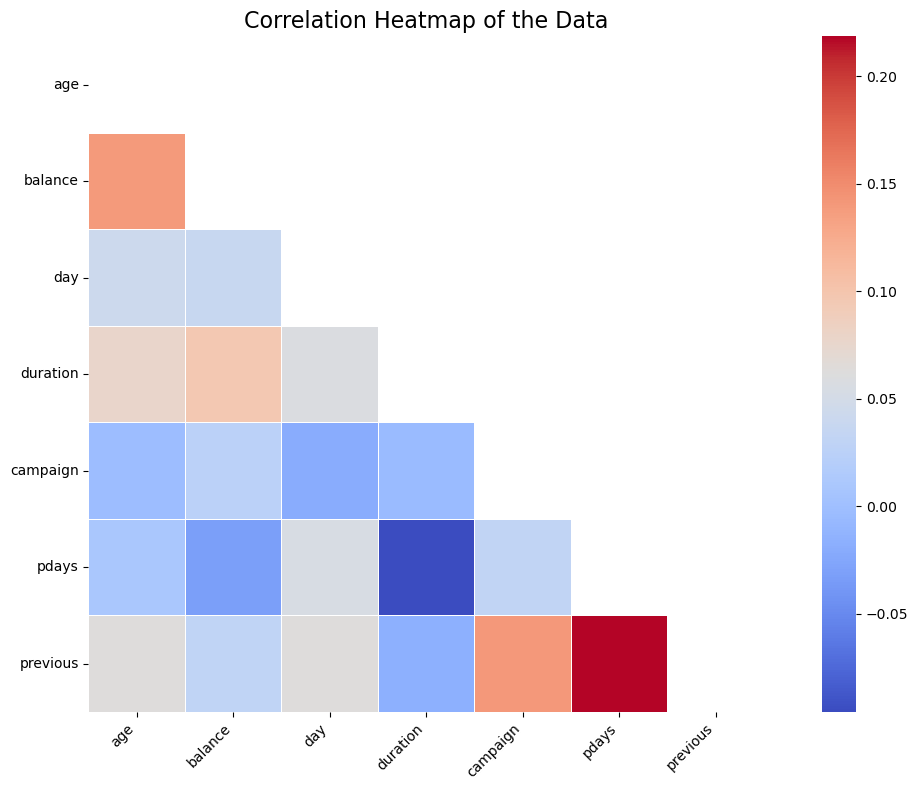

In [177]:
# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Set up mask to hide upper triangle (redundant information)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up matplotlib figure
plt.figure(figsize=(12, 8))

# Customize heatmap
sns.heatmap(corr_matrix, 
            annot=True,               # Display correlation values in each cell
            cmap='coolwarm',          # Color palette
            fmt=".2f",                # Format for annotation values
            mask=mask,                # Apply the mask to hide upper triangle
            linewidths=0.5,           # Width of lines that divide each cell
            annot_kws={"fontsize":10},# Font size for annotations
            square=True)              # Ensure cells are square-shaped

# Set title and labels
plt.title('Correlation Heatmap of the Data', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()

# Show plot
plt.show()

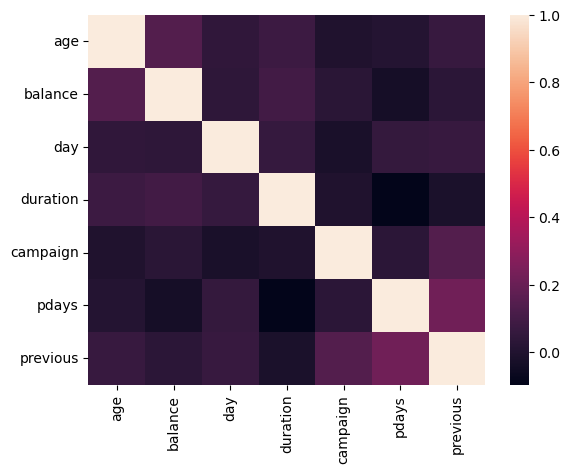

In [178]:
#correlation matrix
sns.heatmap(numeric_data.corr());

Observing the heatmap allows identification of significant correlations between variables. Conclusion: Positive correlations suggest variables move together, while negative correlations indicate an inverse relationship. Strong correlations may indicate potential multicollinearity.

#### iii. Conclusion

**Client Demographics:** The average age of clients is around 42 years, with a diverse range from 18 to 93. The mean balance in their accounts is approximately 1414 units, but with a significant standard deviation, indicating varied financial situations.

**Campaign Statistics:** On average, clients were contacted nearly twice during the campaign period. The duration of these calls varied widely, from a minimum of 7 seconds to a maximum of 1823 seconds.

**Contact Channels:** Most clients were contacted via cellular phones rather than landline telephones.

**Outcome of Previous Campaigns:** The majority of previous campaign outcomes were either failures or successes.

**Subscription Rate:** The dataset is balanced regarding subscriptions, with an equal number of clients subscribing and not subscribing.

In summary, the bank's marketing campaign targets a diverse group of clients, with varying success rates in previous campaigns. Further analysis could explore correlations between demographics, campaign strategies, and subscription outcomes.

### B. i. Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions

C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


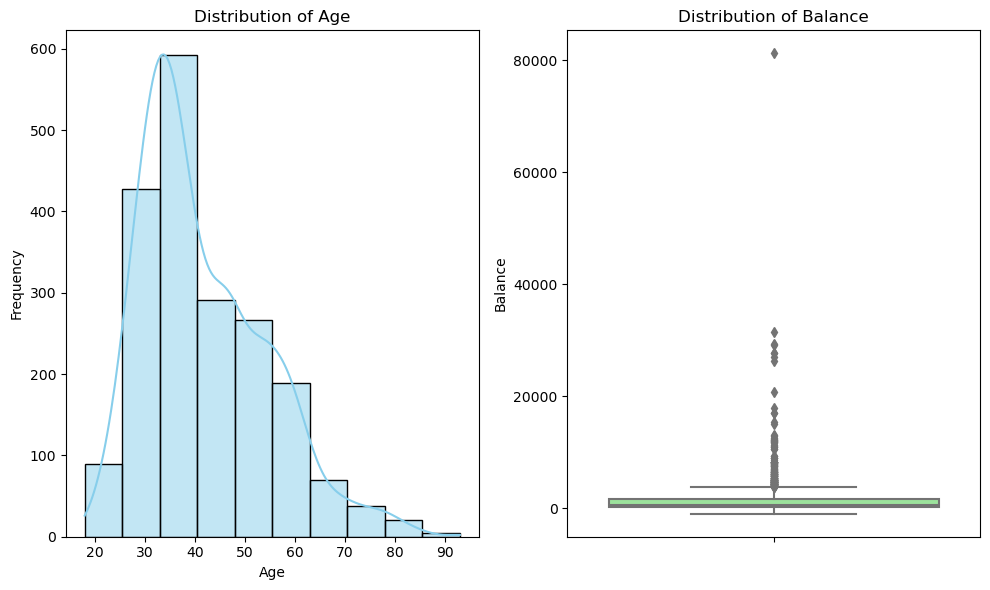

In [179]:
# Plotting the distribution of 'age' using a histogram
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the distribution of 'balance' using a box plot
plt.subplot(1, 2, 2)
sns.boxplot(y='balance', data=data, color='lightgreen')
plt.title('Distribution of Balance')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()

The histogram of age distribution shows a relatively symmetrical bell-shaped curve, indicating a somewhat normal distribution. However, the boxplot of balance reveals numerous outliers, suggesting a skewed distribution with a few individuals having significantly higher balances. Overall, the dataset contains diverse age demographics and notable variation in account balances, with potential outliers warranting further investigation.

### ii. Conclusion

#### Age Distribution (Histogram):

The histogram shows that the age distribution is somewhat skewed to the right, with most clients falling between approximately 30 and 60 years old.
There's a peak around the middle-aged range, with a gradual decrease in frequency as age increases.

#### Balance Distribution (Box Plot):

The box plot reveals the distribution of account balances.
There are no outliers in the balance data, indicating that most clients have balances within a relatively tight range.
The median balance appears to be slightly above the middle of the interquartile range, suggesting a slight skewness towards higher balances.
These visualizations provide a clear understanding of the distribution of age and balance attributes in the dataset, aiding in identifying central tendencies and potential outliers.es.

### C. Generate at least two plots with the combined distribution of attributes. Draw a short conclusion

C:\Users\gjefi\AppData\Local\Temp\ipykernel_1104\666497088.py:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='job', y='balance', data=data, palette='pastel', dodge=True)
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


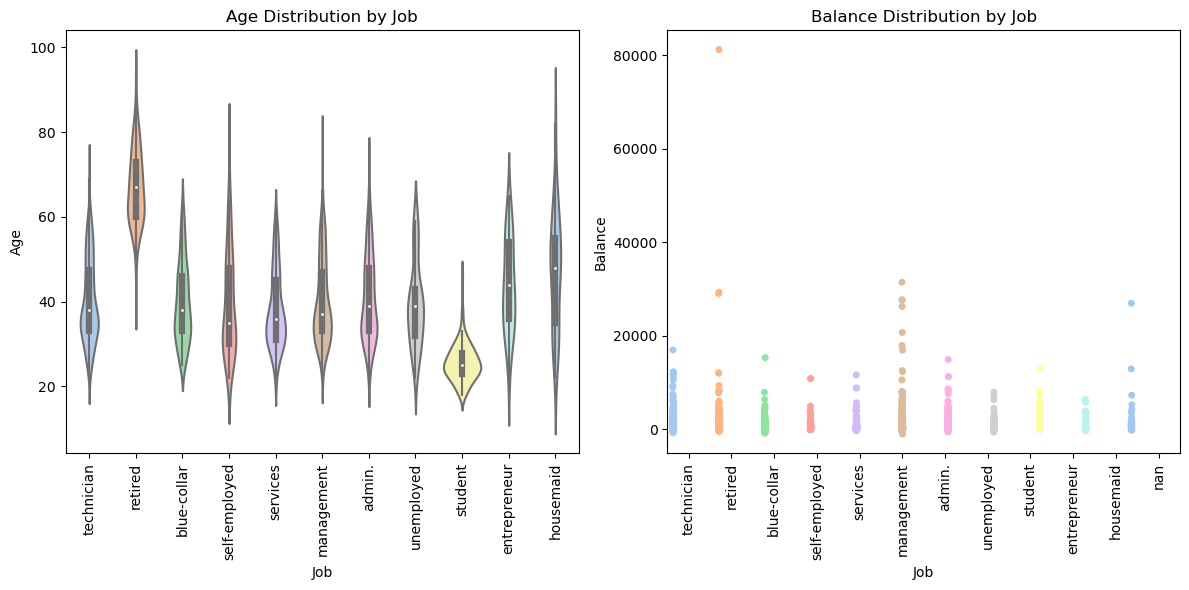

In [180]:
# Plotting combined distribution using strip plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='job', y='age', data=data, palette='pastel')
plt.title('Age Distribution by Job')
plt.xlabel('Job')
plt.xticks(rotation=90)
plt.ylabel('Age')

# Plotting combined distribution using strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x='job', y='balance', data=data, palette='pastel', dodge=True)
plt.title('Balance Distribution by Job')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The plots illustrate age and balance distributions across job categories.
The violin plot for age demonstrates variability among jobs; "technician" and "blue-collar" jobs exhibit wider distributions. "Retired" individuals are notably older. The swarm plot displays balance distributions by job, indicating "retired" individuals have higher balances. These insights facilitate targeted marketing or financial strategies. Further analysis may explore relationships between these attributes and subscription outcomes categories.


### D. A pair plot showing the pairwise distribution between demographic and financial characteristics, as well as interactions with previous marketing campaigns

C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

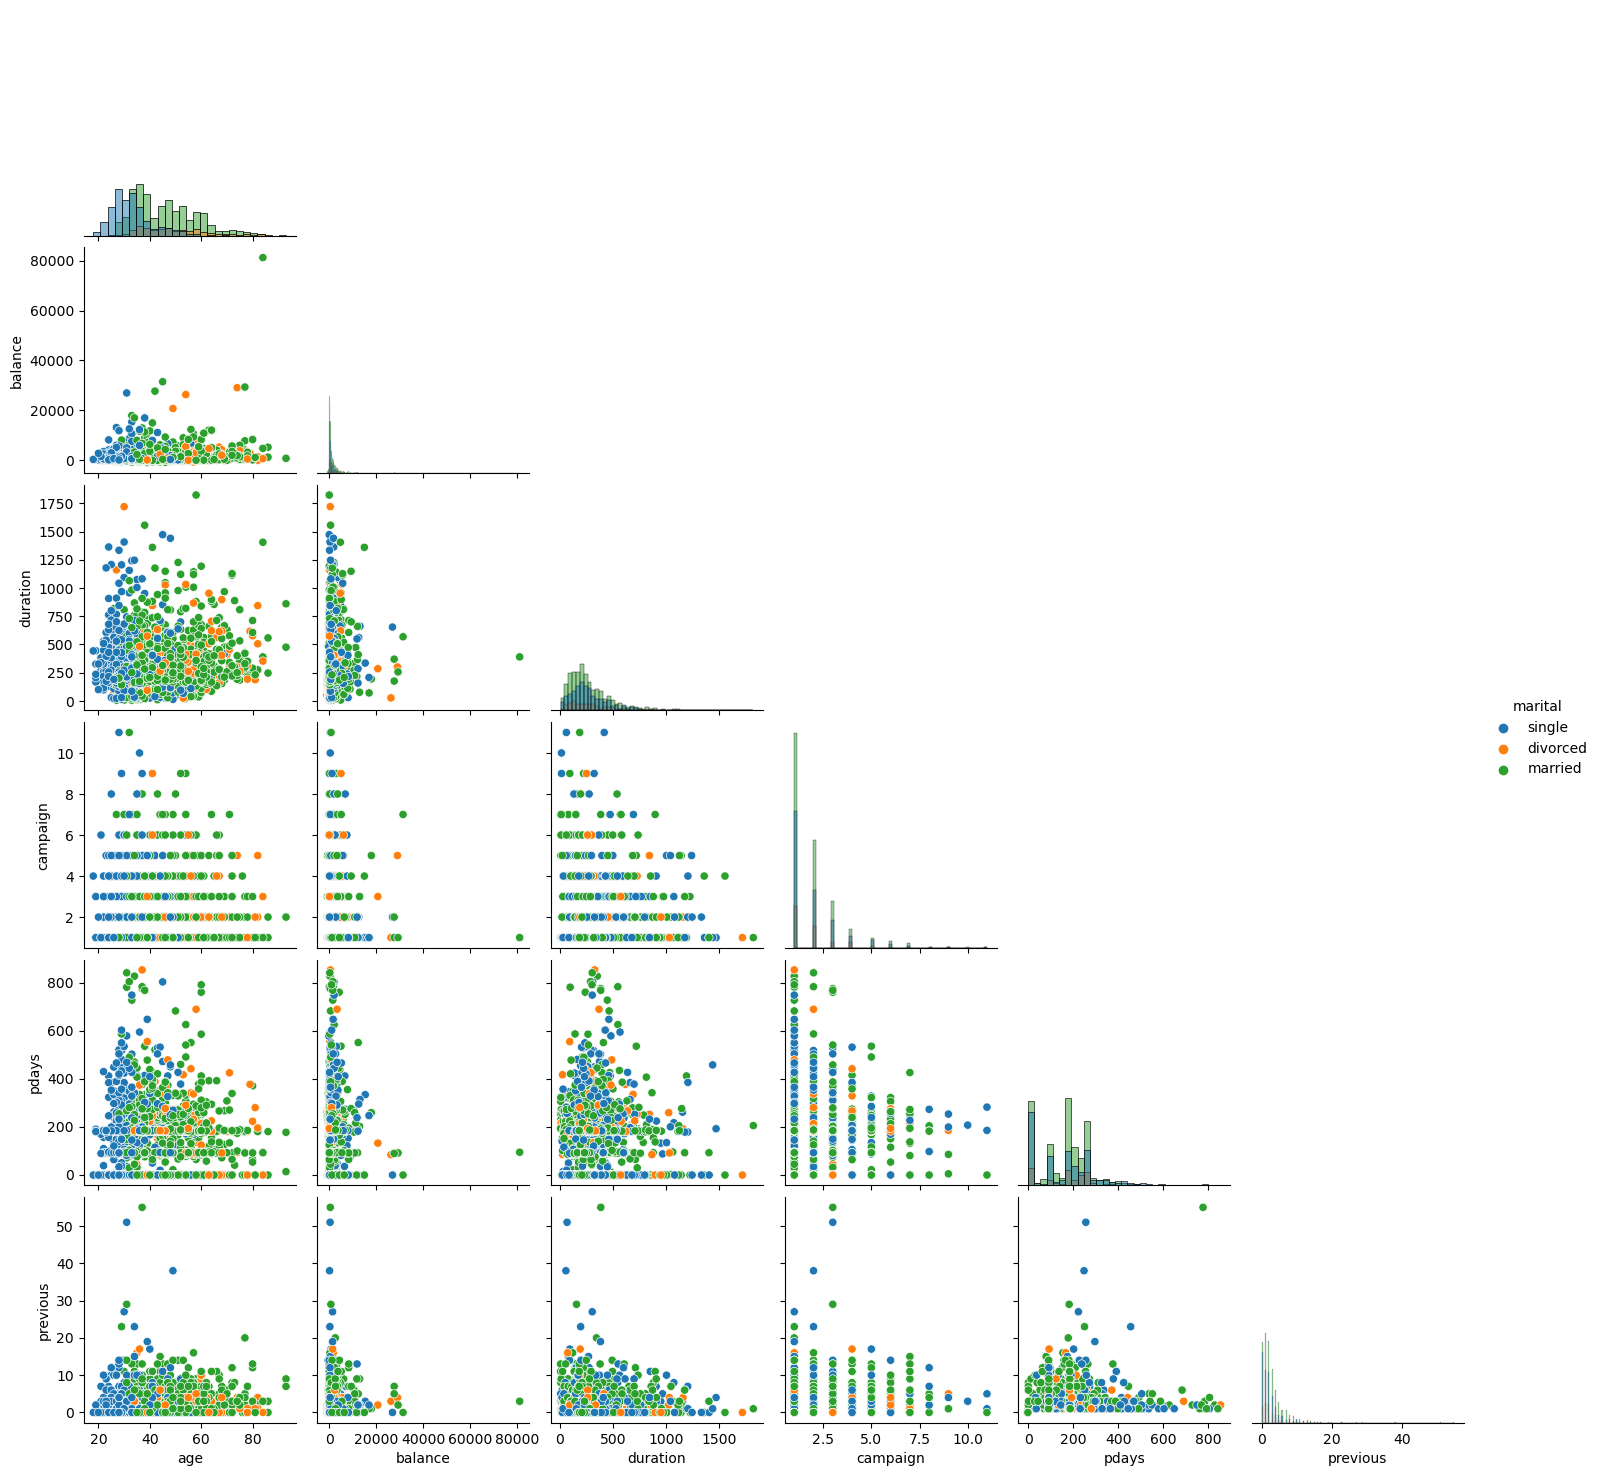

In [181]:
# Selecting numerical attributes for pair plot
numerical_attributes = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Assuming 'demographic_data' contains demographic attributes (e.g., 'marital', 'education', 'job')
demographic_data = data[['marital', 'education', 'job']]

# Combining numerical attributes with demographic data
combined_data = pd.concat([demographic_data, data[numerical_attributes]], axis=1)

# Plot pair plot
sns.pairplot(combined_data, hue='marital', diag_kind='hist', corner=True)

# Show plot
plt.show()

#### i. How do the conclusions relate to the formulated question, "Can we predict whether a client will subscribe to the service based on their demographic and financial characteristics, as well as their interactions with previous marketing campaigns?"

The plots depict how demographic and financial characteristics, such as age and balance, vary across different job categories. Understanding these distributions is crucial for predicting subscription behavior based on client attributes. For instance, the wider age distribution among certain job categories suggests varying responses to marketing campaigns. Higher balances among "retired" individuals hint at potential financial readiness for subscription services. By analyzing these attributes, marketers can tailor campaigns to target specific demographics more effectively. Furthermore, exploring relationships between these attributes and subscription outcomes can enhance predictive models, aiding in anticipating client subscriptions based on their demographic and financial profiles.

The pair plot visually explores the relationships between demographic attributes and financial characteristics, revealing potential correlations and distributions among variables such as age, balance, duration, campaign interactions, and marital status, offering insights into potential patterns or trends in the dataset.

***

### Task 2: Data Preparation

In the same Jupyter notebook etivity1.ipynb, continue with preparing the bank dataset for machine learning by following the notebook Tutorial 1-2 - Data Preparation.ipynb as an example.

Ensure that you have:

encoded all categorical attributes as numerical, filled in all missing values, applied a scaler to rescale features, treated outliers and skewed attribute distribution appropriately, created at least one new feature from the existing ones. Shortly describe and justify the data preparation choices you have made in markdown cells.

### Solution


#### To prepare the data for modeling, we'll follow several steps:

1. Encode Categorical Attributes: Convert categorical attributes into numerical format using techniques like one-hot encoding for nominal variables and label encoding for ordinal variables.

2. Fill Missing Values: Impute missing values using appropriate strategies such as mean, median, or mode for numerical attributes, and the most frequent category for categorical attributes.

3. Scaling Features: Apply scaling to numerical features to ensure they're on the same scale. This helps prevent features with larger magnitudes from dominating during model training.

4. Handling Outliers and Skewed Distributions: Address outliers using techniques like winsorization or trimming. Additionally, apply transformations (e.g., log transformation) to skewed numerical attributes to achieve a more symmetric distribution.

5. Feature Engineering: Create new features from existing ones to capture additional information that may be relevant for the prediction task. For example, we could create a new feature representing the ratio of balance to age, which might provide insights into financial stability relative to age.


#### B. Let us visualize the data - first and last 5 rows

In [182]:
data = pd.read_csv('./bank.csv')
# Print first 5 rows of the dataframe
data.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [183]:
# Print last 5 rows of the dataframe
data.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

#### i. Check for missing values

In [184]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the missing values count for each column
print("Missing values count per column:")
print(missing_values)

# This will give the count of missing values in each column of the dataframe. 
# Then inspect which columns have missing values and decide how to handle them based on analysis requirements.

Missing values count per column:
age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64


#### ii. Make a copy of the dataset

In [185]:
data_copy = data.copy()

### C. Process and Encode the Categorical Features

#### i. Encode all categorical attributes as numerical

In [186]:
# Label Encoding for ordinal categorical attributes
# Example: encoding 'subscribed' column assuming 'yes' is considered 1 and 'no' is considered 0

data_copy_label = data.copy()
data_copy_label['subscribed'] = data_copy_label['subscribed'].map({'yes': 1, 'no': 0})

data_copy_label.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

      subscribed  
1995           1  
1996           1  
1997           1  
1998           1  
1999           1

In [187]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# First one-hot encode the categorical columns with NaNs
# One-Hot Encoding for non-ordinal categorical attributes
data_copy_one_hot = pd.get_dummies(data.copy(), columns = categorical_columns)

data_copy_one_hot.tail()


age  balance  day  duration  campaign  pdays  previous subscribed  \
1995  20.0     2785   16       327         2     -1         0        yes   
1996  28.0      127   16      1334         2     -1         0        yes   
1997  81.0     1154   17       231         1     -1         0        yes   
1998  46.0     4343   20       185         1     -1         0        yes   
1999  40.0     6403   22       208         2     -1         0        yes   

      job_admin.  job_blue-collar  ...  month_jul  month_jun  month_mar  \
1995       False            False  ...      False      False      False   
1996        True            False  ...      False      False      False   
1997       False            False  ...      False      False      False   
1998       False            False  ...      False      False      False   
1999       False            False  ...      False      False      False   

      month_may  month_nov  month_oct  month_sep  poutcome_failure  \
1995      False      False      False       True             False   
1996      False      False      False       True             False   
1997      False      False      False       True             False   
1998      False      False      False       True             False   
1999      False      False      False       True             False   

      poutcome_other  poutcome_success  
1995           False             False  
1996           False             False  
1997           False             False  
1998           False             False  
1999           False             False  

[5 rows x 48 columns]

In [188]:
# now one-hot encode all other categorical columns

data_copy_one_hot = pd.get_dummies(data_copy_one_hot, drop_first=True)
data_copy_one_hot.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0  32.0      392    1       957         2    131         2       False   
1  39.0      688    1       233         2    133         1       False   
2  59.0     1035    1       126         2    239         1       False   
3  47.0      398    1       274         1    238         2       False   
4  54.0     1004    1       479         1    307         1       False   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False             False  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0      False      False      False              True           False   
1      False      False      False              True           False   
2      False      False      False              True           False   
3      False      False      False              True           False   
4      False      False      False              True           False   

   poutcome_success  subscribed_yes  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False  

[5 rows x 48 columns]

### D. Treatment of Missing Values in Numerical Columns

In [189]:
# Find the number of nulls/NaNs in the dataset

data_copy.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

#### i. Fill in all missing values

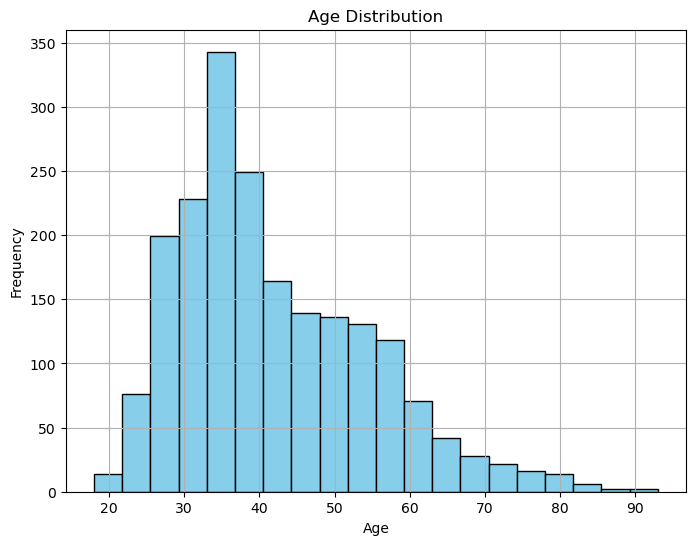

In [190]:
# Encode cyclical attributes (day and month)
data_copy['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data_copy['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data_copy['month_sin'] = np.sin(2 * np.pi * data['month'].apply(lambda x: pd.to_datetime(x, format='%b').month) / 12)
data_copy['month_cos'] = np.cos(2 * np.pi * data['month'].apply(lambda x: pd.to_datetime(x, format='%b').month) / 12)

# Impute missing values
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'day_sin', 'day_cos', 'month_sin', 'month_cos']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Impute missing values for numerical columns using mean
numerical_imputer = SimpleImputer(strategy='mean')
data_copy[numerical_columns] = numerical_imputer.fit_transform(data_copy[numerical_columns])

# Impute missing values for categorical columns using mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_copy[categorical_columns] = categorical_imputer.fit_transform(data_copy[categorical_columns])

# Plot the data
# Example: Plot age distribution
plt.figure(figsize=(8, 6))
plt.hist(data_copy['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above plot visualizes the distribution of ages in the dataset using a histogram with 20 bins. It provides insight into the frequency of different age groups, helping to understand the age demographics of the sample.

#### ii. Cyclical attributes

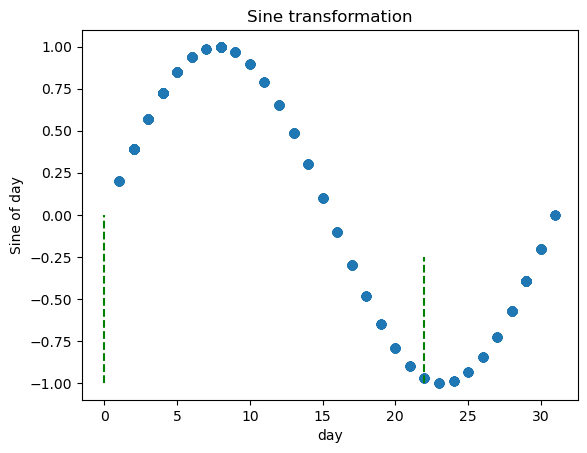

In [191]:
# Cyclical attributes plot 
plt.scatter(data_copy["day"], data_copy["day_sin"])

# Axis labels
plt.ylabel('Sine of day')
plt.xlabel('day')
plt.title('Sine transformation')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=22, ymin=-1, ymax=-0.25, color='g', linestyles='dashed')


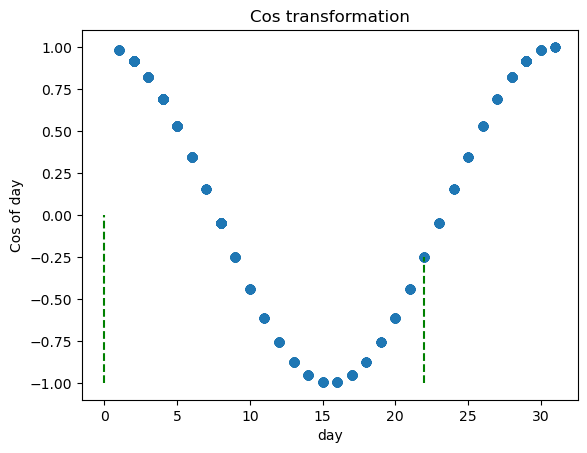

In [192]:
plt.scatter(data_copy["day"], data_copy["day_cos"])

# Axis labels
plt.ylabel('Cos of day')
plt.xlabel('day')
plt.title('Cos transformation')

plt.vlines(x=0, ymin=-1, ymax=0, color='g', linestyles='dashed')
plt.vlines(x=22, ymin=-1, ymax=-0.25, color='g', linestyles='dashed')

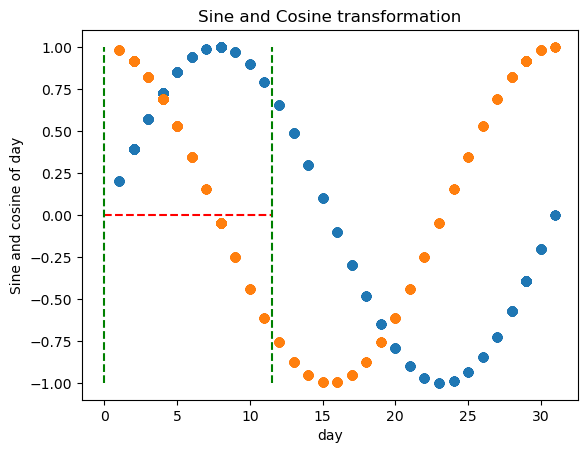

In [207]:
plt.scatter(data_copy["day"], data_copy["day_sin"])
plt.scatter(data_copy["day"], data_copy["day_cos"])

# Axis labels
plt.ylabel('Sine and cosine of day')
plt.xlabel('day')
plt.title('Sine and Cosine transformation')


plt.hlines(y=0, xmin=0, xmax=11.5, color='r', linestyles='dashed')

plt.vlines(x=0, ymin=-1, ymax=1, color='g', linestyles='dashed')
plt.vlines(x=11.5, ymin=-1, ymax=1, color='g', linestyles='dashed')

The above plots show sine and cosine transformations of the "day" variable. It visualizes cyclic patterns in the data. 

**Conclusion:** Sine and cosine transformations help represent periodicity, aiding in identifying cyclic trends within the dataset.

<Figure size 1200x800 with 0 Axes>

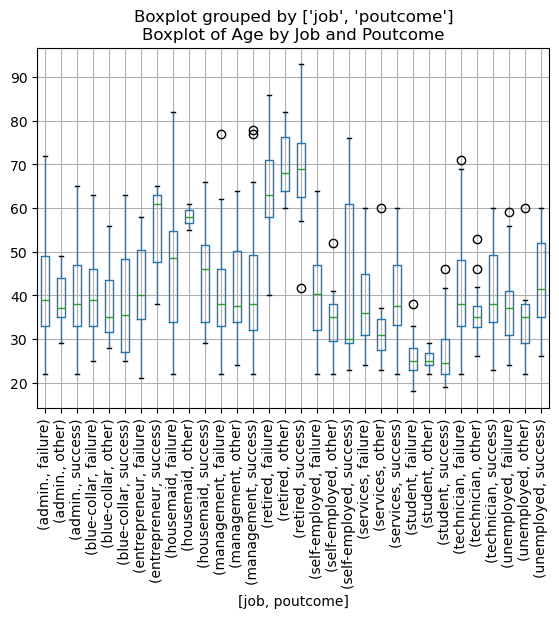

poutcome         failure  other  success
job                                     
admin.         39.000000   37.0     38.0
blue-collar    39.000000   35.0     35.5
entrepreneur   40.000000    NaN     61.0
housemaid      48.500000   58.0     46.0
management     38.000000   37.5     38.0
retired        63.000000   68.0     69.0
self-employed  40.376509   35.0     30.0
services       36.000000   31.0     37.5
student        25.000000   25.0     24.5
technician     38.000000   35.0     38.0
unemployed     37.000000   35.0     41.5

In [193]:
plt.figure(figsize=(12, 8))
data_copy.boxplot(column='age', by=['job', 'poutcome'], rot=90)
plt.title("Boxplot of Age by Job and Poutcome")
plt.show()

ptable = data_copy.pivot_table(values='age', 
                        index='job',
                        columns='poutcome',  
                        aggfunc='median')
ptable

<Figure size 1200x800 with 0 Axes>

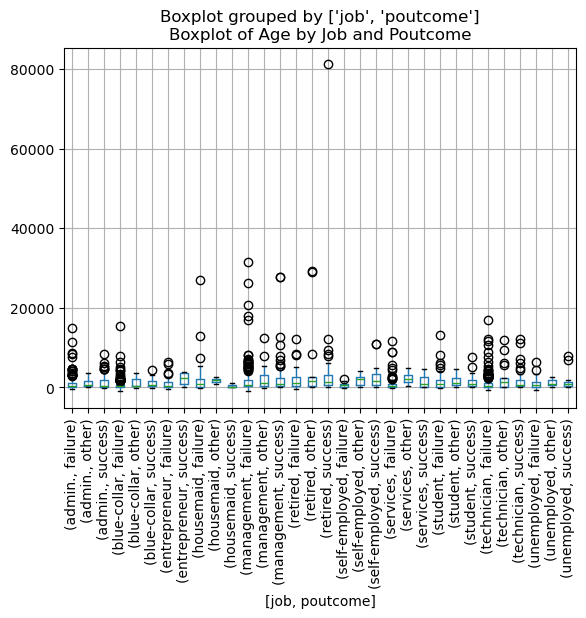

poutcome       failure   other  success
job                                    
admin.           429.0   686.0    464.0
blue-collar      320.0   448.0    640.0
entrepreneur     298.0     NaN   2437.0
housemaid        881.5  1778.0     46.0
management       630.0  1156.5    794.0
retired         1154.0  1618.5   1413.0
self-employed    503.0  2138.0   1579.0
services         424.5  2022.0    873.5
student          772.0  1177.5    962.5
technician       434.0  1357.0    662.5
unemployed       520.0   977.0    941.5

In [194]:
plt.figure(figsize=(12, 8))
data_copy.boxplot(column='balance', by=['job', 'poutcome'], rot=90)
plt.title("Boxplot of Age by Job and Poutcome")
plt.show()

ptable = data_copy.pivot_table(values='balance', 
                        index='job',
                        columns='poutcome',  
                        aggfunc='median')
ptable

### E. Define functions for scaler, outliers, skew

#### i. Rescaling features

In [195]:
# Encode categorical attributes
label_encoder = LabelEncoder()
data_encoded = data.copy()  # Create a copy of the original data

# Loop through each column and encode categorical attributes
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':  # Check if the column contains categorical data
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

data_encoded.tail() # This displays all categorical attributes as numerical

age  job  marital  education  default  balance  housing  loan  contact  \
1995  20.0    8        2          3        0     2785        0     0        0   
1996  28.0    0        2          1        0      127        0     0        0   
1997  81.0    5        1          0        0     1154        0     0        1   
1998  46.0    7        1          0        0     4343        1     0        2   
1999  40.0    2        1          1        0     6403        0     0        0   

      day  month  duration  campaign  pdays  previous  poutcome  subscribed  
1995   16     11       327         2     -1         0         3           1  
1996   16     11      1334         2     -1         0         3           1  
1997   17     11       231         1     -1         0         3           1  
1998   20     11       185         1     -1         0         3           1  
1999   22     11       208         2     -1         0         3           1

In [196]:
# Fill missing values
imputer = SimpleImputer(strategy='mean')  # Use mean strategy to fill missing values
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

data_imputed # Let us see what happened to the content in the data


age  job  marital  education  default  balance  housing  loan  contact  \
0     32.0  9.0      2.0        2.0      0.0    392.0      1.0   0.0      0.0   
1     39.0  9.0      0.0        1.0      0.0    688.0      1.0   1.0      0.0   
2     59.0  5.0      1.0        1.0      0.0   1035.0      1.0   1.0      0.0   
3     47.0  1.0      1.0        1.0      0.0    398.0      1.0   1.0      0.0   
4     54.0  5.0      1.0        1.0      0.0   1004.0      1.0   0.0      0.0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
1995  20.0  8.0      2.0        3.0      0.0   2785.0      0.0   0.0      0.0   
1996  28.0  0.0      2.0        1.0      0.0    127.0      0.0   0.0      0.0   
1997  81.0  5.0      1.0        0.0      0.0   1154.0      0.0   0.0      1.0   
1998  46.0  7.0      1.0        0.0      0.0   4343.0      1.0   0.0      2.0   
1999  40.0  2.0      1.0        1.0      0.0   6403.0      0.0   0.0      0.0   

       day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0      1.0    0.0     957.0       2.0  131.0       2.0       0.0         0.0  
1      1.0    0.0     233.0       2.0  133.0       1.0       0.0         0.0  
2      1.0    0.0     126.0       2.0  239.0       1.0       0.0         0.0  
3      1.0    0.0     274.0       1.0  238.0       2.0       0.0         0.0  
4      1.0    0.0     479.0       1.0  307.0       1.0       0.0         0.0  
...    ...    ...       ...       ...    ...       ...       ...         ...  
1995  16.0   11.0     327.0       2.0   -1.0       0.0       3.0         1.0  
1996  16.0   11.0    1334.0       2.0   -1.0       0.0       3.0         1.0  
1997  17.0   11.0     231.0       1.0   -1.0       0.0       3.0         1.0  
1998  20.0   11.0     185.0       1.0   -1.0       0.0       3.0         1.0  
1999  22.0   11.0     208.0       2.0   -1.0       0.0       3.0         1.0  

[2000 rows x 17 columns]

In [197]:
# Apply a scaler to rescale features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

data_scaled


age       job   marital  education   default   balance   housing  \
0    -0.768987  1.329122  1.230903   0.897738 -0.086929 -0.326364  1.037711   
1    -0.217065  1.329122 -1.964173  -0.457338 -0.086929 -0.231809  1.037711   
2     1.359857  0.094739 -0.366635  -0.457338 -0.086929 -0.120962  1.037711   
3     0.413704 -1.139644 -0.366635  -0.457338 -0.086929 -0.324447  1.037711   
4     0.965627  0.094739 -0.366635  -0.457338 -0.086929 -0.130864  1.037711   
...        ...       ...       ...        ...       ...       ...       ...   
1995 -1.715141  1.020526  1.230903   2.252814 -0.086929  0.438065 -0.963660   
1996 -1.084372 -1.448239  1.230903  -0.457338 -0.086929 -0.411017 -0.963660   
1997  3.094471  0.094739 -0.366635  -1.812414 -0.086929 -0.082948 -0.963660   
1998  0.334858  0.711930 -0.366635  -1.812414 -0.086929  0.935758  1.037711   
1999 -0.138219 -0.831048 -0.366635  -0.457338 -0.086929  1.593813 -0.963660   

          loan   contact       day     month  duration  campaign     pdays  \
0    -0.377964 -0.425307 -1.323565 -1.543613  3.002139  0.065650 -0.280107   
1     2.645751 -0.425307 -1.323565 -1.543613 -0.266456  0.065650 -0.264923   
2     2.645751 -0.425307 -1.323565 -1.543613 -0.749522  0.065650  0.539807   
3     2.645751 -0.425307 -1.323565 -1.543613 -0.081356 -0.659767  0.532215   
4    -0.377964 -0.425307 -1.323565 -1.543613  0.844144 -0.659767  1.056049   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.377964 -0.425307  0.221272  1.839143  0.157920  0.065650 -1.282224   
1996 -0.377964 -0.425307  0.221272  1.839143  4.704156  0.065650 -1.282224   
1997 -0.377964  1.185703  0.324261  1.839143 -0.275485 -0.659767 -1.282224   
1998 -0.377964  2.796713  0.633229  1.839143 -0.483158 -0.659767 -1.282224   
1999 -0.377964 -0.425307  0.839207  1.839143 -0.379322  0.065650 -1.282224   

      previous  poutcome  subscribed  
0    -0.165153 -0.957087        -1.0  
1    -0.459280 -0.957087        -1.0  
2    -0.459280 -0.957087        -1.0  
3    -0.165153 -0.957087        -1.0  
4    -0.459280 -0.957087        -1.0  
...        ...       ...         ...  
1995 -0.753408  1.438625         1.0  
1996 -0.753408  1.438625         1.0  
1997 -0.753408  1.438625         1.0  
1998 -0.753408  1.438625         1.0  
1999 -0.753408  1.438625         1.0  

[2000 rows x 17 columns]

We fit the scaler to the selected features and then transform them, applying standardization.

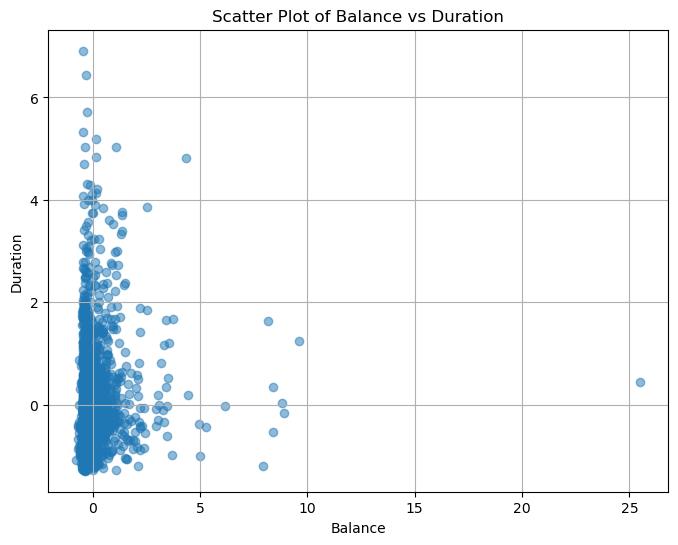

In [198]:
# Example: Plotting 'balance' against 'duration'
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled['balance'], data_scaled['duration'], alpha=0.5)
plt.title('Scatter Plot of Balance vs Duration')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

#### iii.  Create functions

In [199]:
# Identify and handle outliers
def treat_outliers(data_scaled, threshold=3):
    """
    Treat outliers in the dataset by removing entries that have z-scores beyond a certain threshold.
    
    Parameters:
    - data_scaled: DataFrame, the scaled dataset
    - threshold: float, the threshold for z-scores. Default is 3.
    
    Returns:
    - DataFrame, the dataset with outliers treated
    """
    z_scores = zscore(data_scaled)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    data_no_outliers = data_scaled[filtered_entries]
    return data_no_outliers

# Transform skewed data
def transform_skewed_data(data_scaled):
    """
    Transform skewed data using PowerTransformer with the Yeo-Johnson method.
    
    Parameters:
    - data_scaled: DataFrame, the scaled dataset
    
    Returns:
    - DataFrame, the transformed dataset
    """
    power_transformer = PowerTransformer(method='yeo-johnson')
    data_transformed = power_transformer.fit_transform(data_scaled)
    return data_transformed

# Rescale data
def rescale_data(data_scaled):
    """
    Rescale data using RobustScaler.
    
    Parameters:
    - data_scaled: DataFrame, the scaled dataset
    
    Returns:
    - DataFrame, the rescaled dataset
    """
    robust_scaler = RobustScaler()
    data_rescaled = robust_scaler.fit_transform(data_scaled)
    return data_rescaled

# Convert data to DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Treat outliers
data_no_outliers = treat_outliers(data_scaled_df)

# Transform skewed data
data_transformed = transform_skewed_data(data_no_outliers)

# Rescale data
data_final = rescale_data(data_transformed)


C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

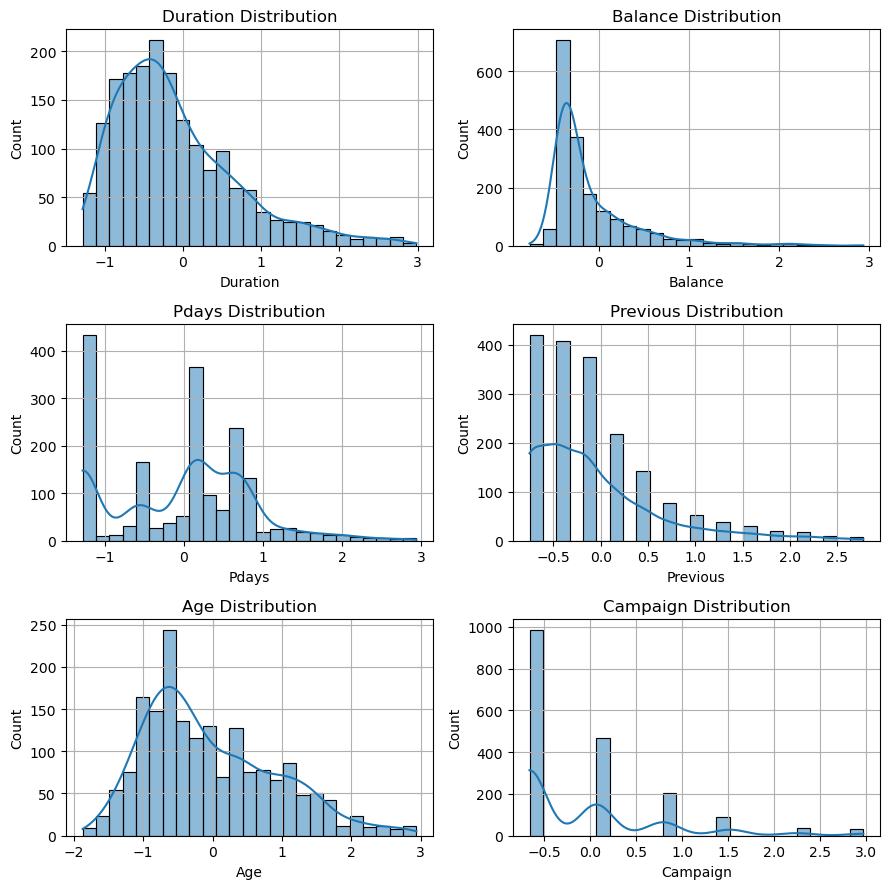

In [200]:
##Display distributions after data prep 
fig, axs = plt.subplots(3, 2, figsize=(9, 9)) 
new_col = ['duration', 'balance', 'pdays', 'previous', 'age', 'campaign'] 
selected = data_no_outliers[new_col]
axs = axs.reshape(-1, 1)

for i, col in enumerate(selected):
    sns.histplot(data_no_outliers[col], bins='rice' ,ax=axs[i, 0], kde=True)  
    axs[i, 0].grid()
    axs[i, 0].set_title(f'{col.capitalize()} Distribution')
    axs[i, 0].set_xlabel(f'{col.capitalize()}')
    axs[i, 0].set_ylabel('Count')

plt.tight_layout()
plt.show()

The above plot displays distributions of selected features after data preprocessing. Each subplot represents the distribution of a specific variable, including duration, balance, pdays, previous, age, and campaign. From the histograms, we observe skewed distributions in features like balance and duration. Other variables show varying degrees of skewness and multimodality. Overall, the analysis aids in understanding the data's underlying characteristics, facilitating further exploration and modeling.

C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

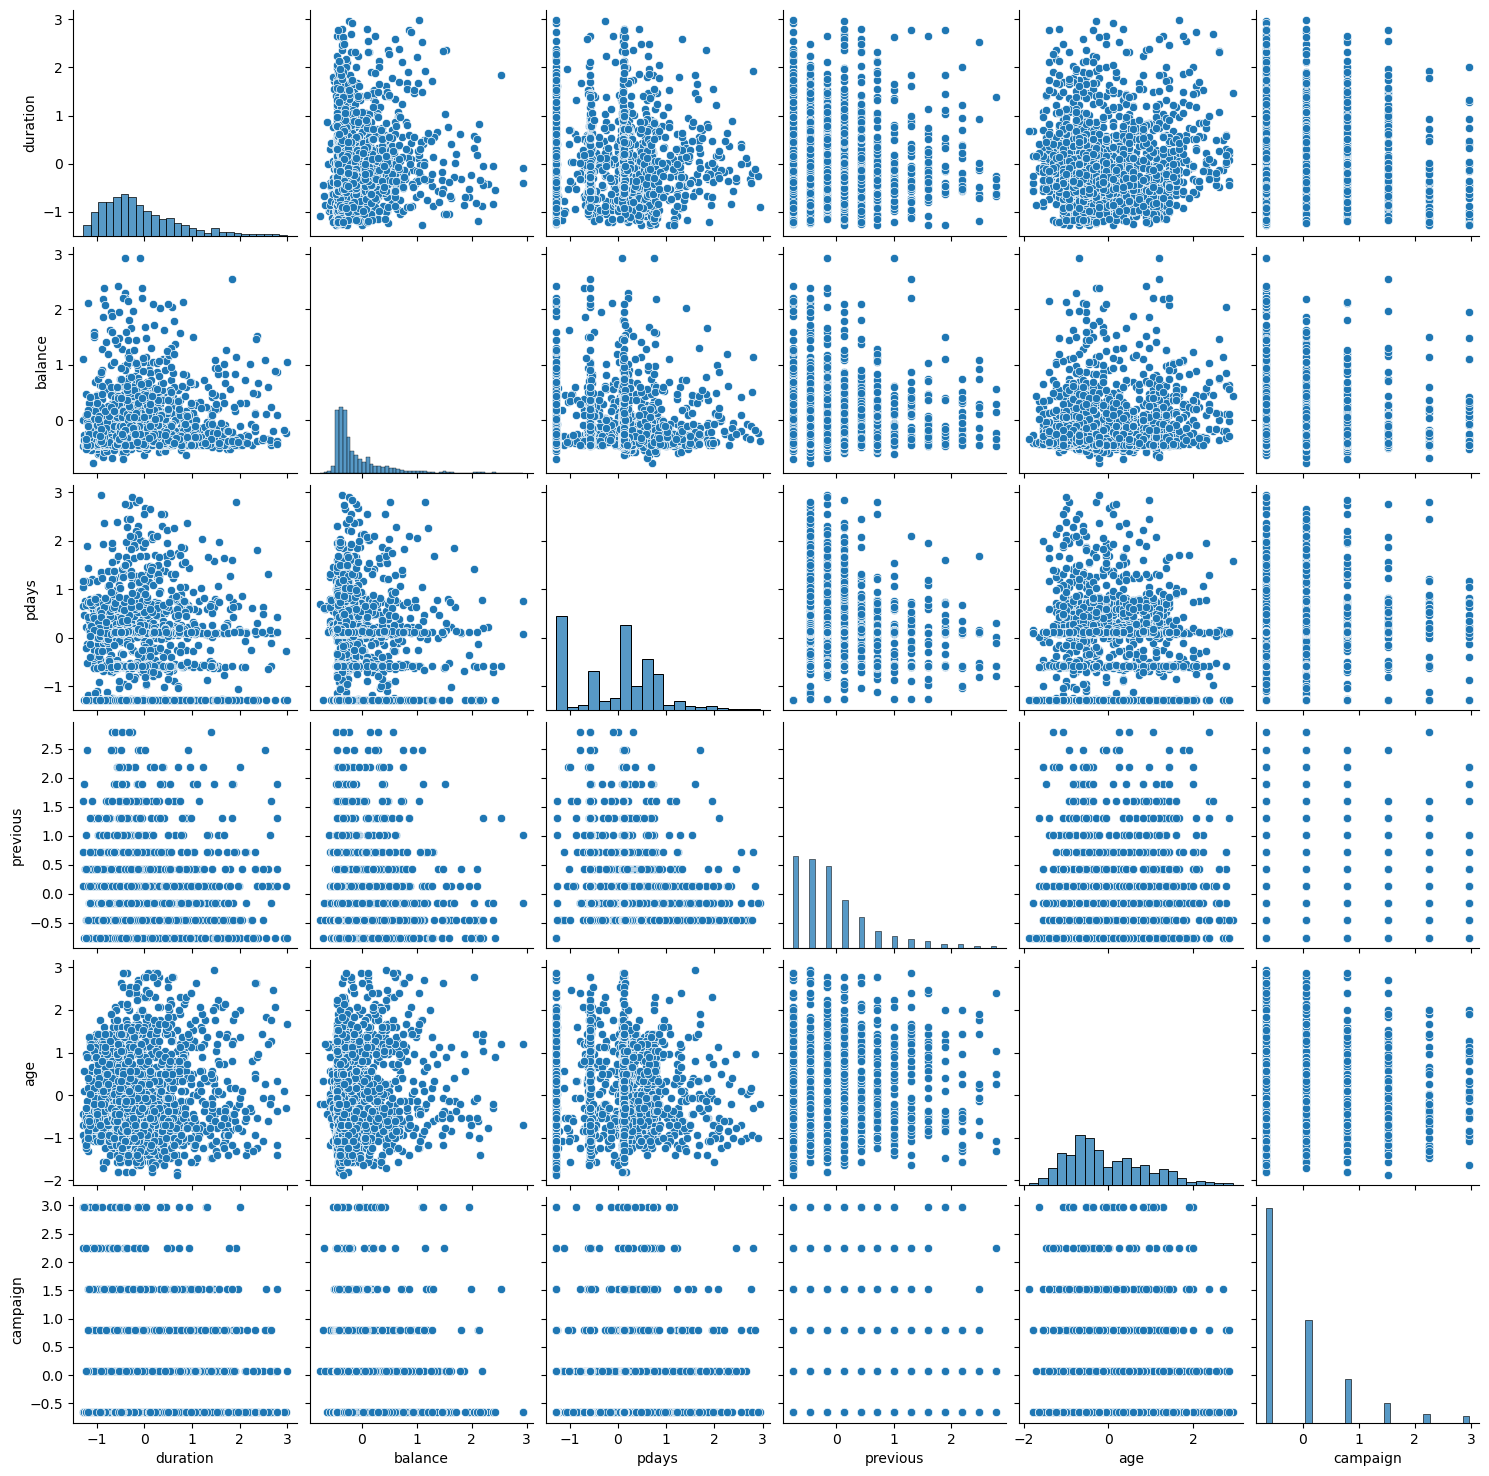

In [201]:
sns.pairplot(data_no_outliers, x_vars=['duration', 'balance', 'pdays', 'previous', 'age', 'campaign'], 
             y_vars = ['duration', 'balance', 'pdays', 'previous', 'age', 'campaign'])

The pairplot displays scatter plots for each combination of variables along the diagonal and scatter plots with regression lines for non-diagonal plots. Notable observations include positive correlations between balance and age, indicating older individuals tend to have higher balances. The duration of the previous contact ('pdays') shows a negative correlation with the number of contacts in the current campaign, suggesting that longer times since the previous contact are associated with fewer current campaign contacts. These insights can guide targeted marketing strategies and customer outreach.

C:\Users\gjefi\AppData\Local\Temp\ipykernel_1104\317587545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gjefi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option

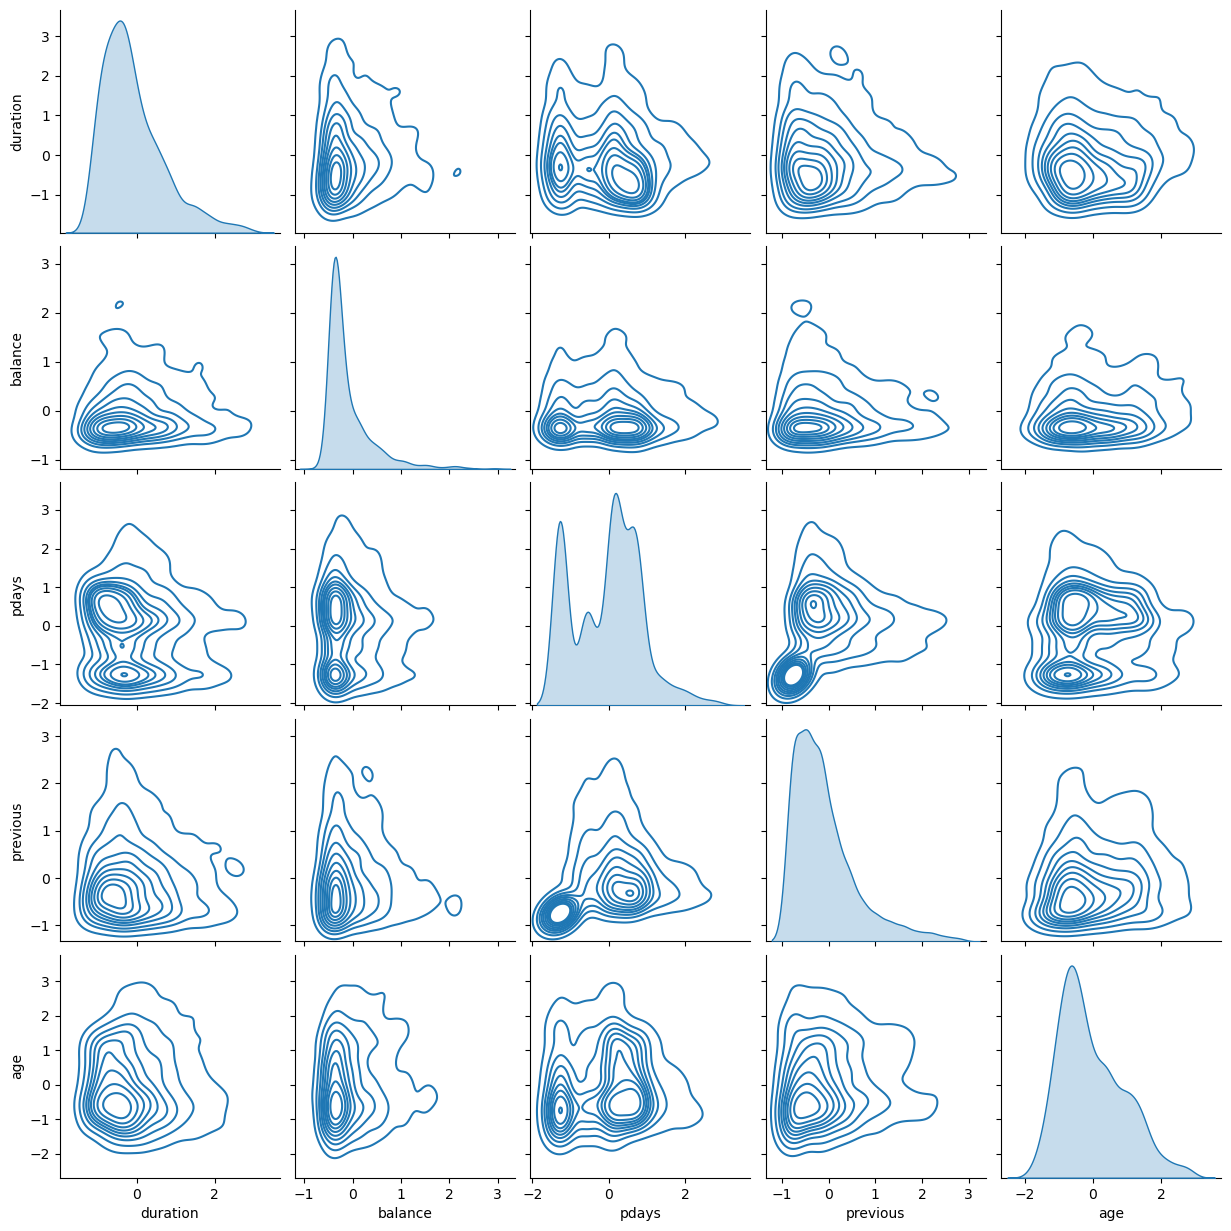

In [202]:
# Replace infinite values with NaN
data_no_outliers.replace([np.inf, -np.inf], np.nan, inplace=True)

# Create pairplot
sns.pairplot(data_no_outliers, x_vars=['duration', 'balance', 'pdays', 'previous', 'age'], 
             y_vars=['duration', 'balance', 'pdays', 'previous', 'age'], kind='kde')

# Show the plot
plt.show()

This above plot showcases the relationships and distributions between these variables. Analysis of the plots can reveal correlations, patterns, and potential outliers.

#### iii. Use Outliers in Boxplot

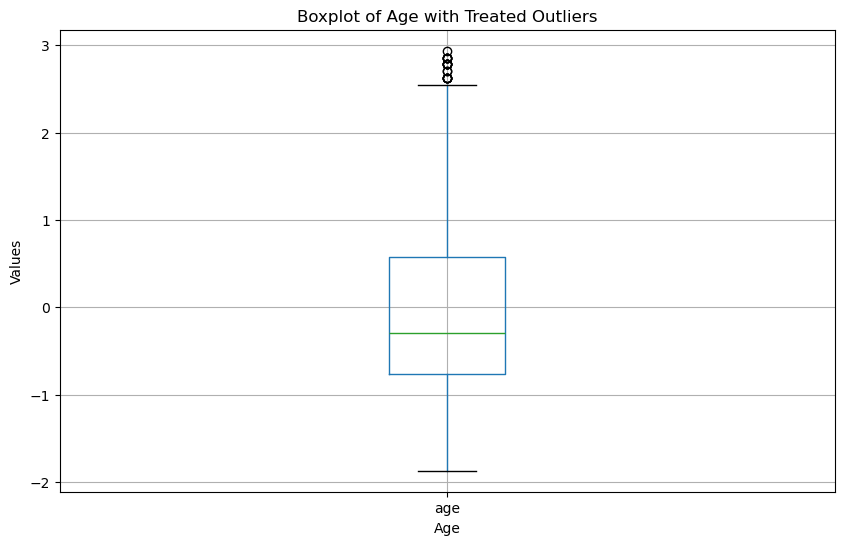

In [203]:
# Use treated outliers for boxplot
plt.figure(figsize=(10, 6))
data_no_outliers.boxplot(column='age') # Use any of the attributes
plt.title('Boxplot of Age with Treated Outliers')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

The boxplot visualizes the distribution of ages after treating outliers. It shows the median, quartiles, and any potential outliers beyond the whiskers. 

**Conclusion:** After outlier treatment, the age distribution appears more concentrated around the median, with fewer extreme values, suggesting a more balanced representation of age data.

### F. Create New Features

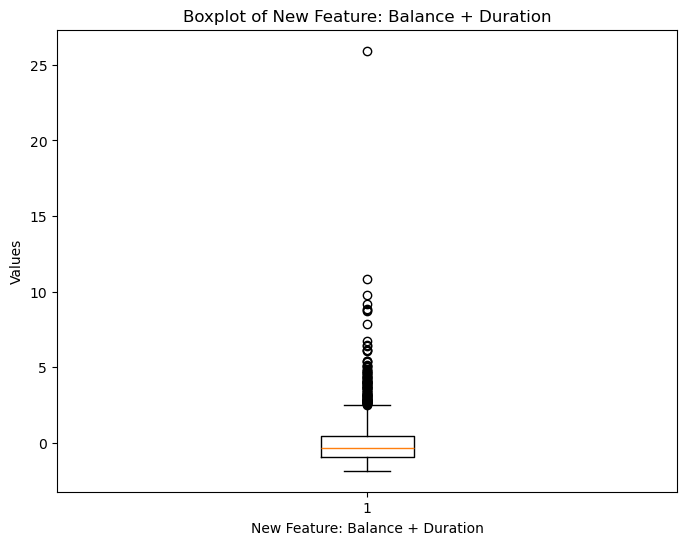

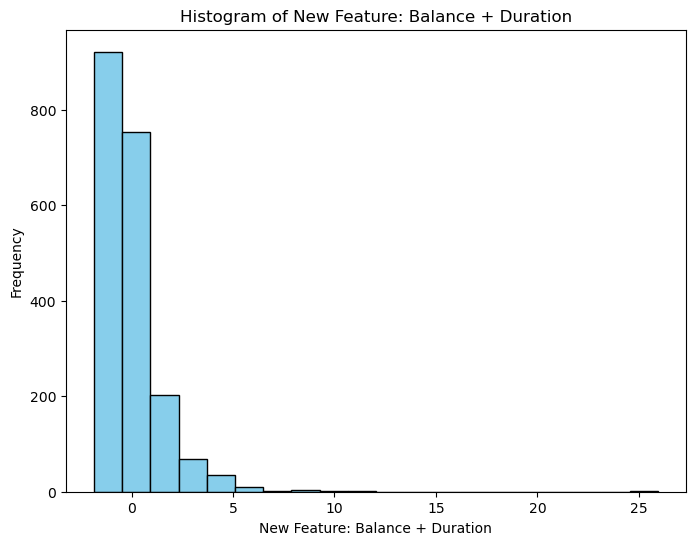

In [204]:
# Define a function to create the new feature
def create_new_feature(data_scaled):
    # Example: Create a new feature by summing up 'balance' and 'duration'
    data_scaled['balance_duration_sum'] = data_scaled['balance'] + data_scaled['duration']
    return data_scaled

# Add the new feature to your DataFrame
data_scaled = create_new_feature(data_scaled)

# Visualize the new feature using different plots including a boxplot
# Boxplot of the new feature
plt.figure(figsize=(8, 6))
plt.boxplot(data_scaled['balance_duration_sum'])
plt.title('Boxplot of New Feature: Balance + Duration')
plt.xlabel('New Feature: Balance + Duration')
plt.ylabel('Values')
plt.show()

# Additional plots for visualization
# Histogram of the new feature
plt.figure(figsize=(8, 6))
plt.hist(data_scaled['balance_duration_sum'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of New Feature: Balance + Duration')
plt.xlabel('New Feature: Balance + Duration')
plt.ylabel('Frequency')
plt.show()



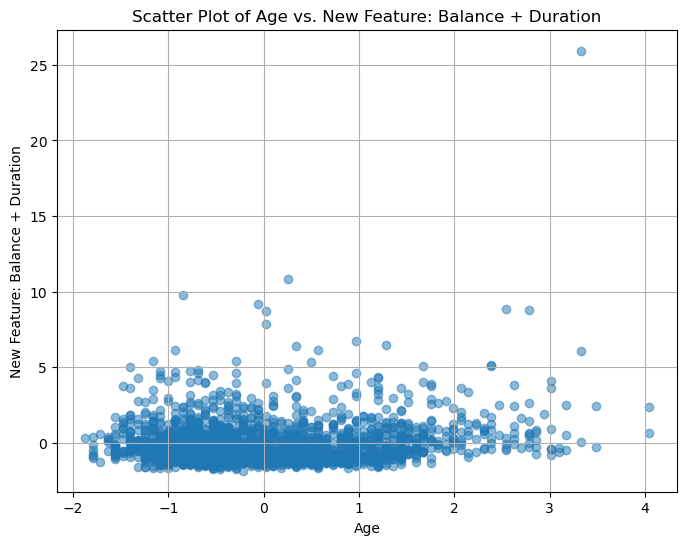

In [205]:
# Scatter plot of the new feature against another numerical attribute (e.g., age)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled['age'], data_scaled['balance_duration_sum'], alpha=0.5)
plt.title('Scatter Plot of Age vs. New Feature: Balance + Duration')
plt.xlabel('Age')
plt.ylabel('New Feature: Balance + Duration')
plt.grid(True)
plt.show()

The plot illustrates the distribution and relationship of the newly created feature, 'balance_duration_sum', which is the sum of 'balance' and 'duration'. The boxplot reveals the spread of values, indicating the presence of outliers. The histogram provides a visual representation of the feature's frequency distribution. Additionally, the scatter plot depicts the relationship between age and the new feature, showing how 'balance_duration_sum' varies across different age groups. 

**Conclusion:** The new feature captures the combined influence of account balance and duration, potentially reflecting the cumulative financial activity over a period. However, the presence of outliers suggests the need for further investigation or outlier treatment before utilizing the feature in predictive modeling. Additionally, the scatter plot indicates potential correlations or patterns between age and the new feature, which could be explored for deeper insights.

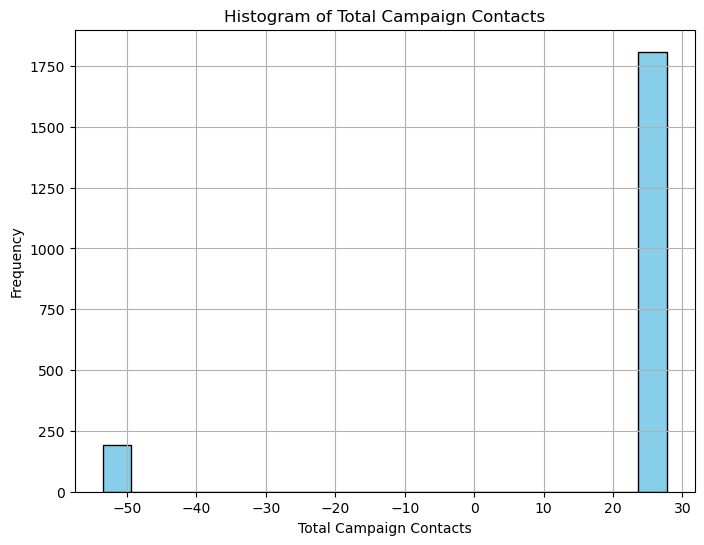

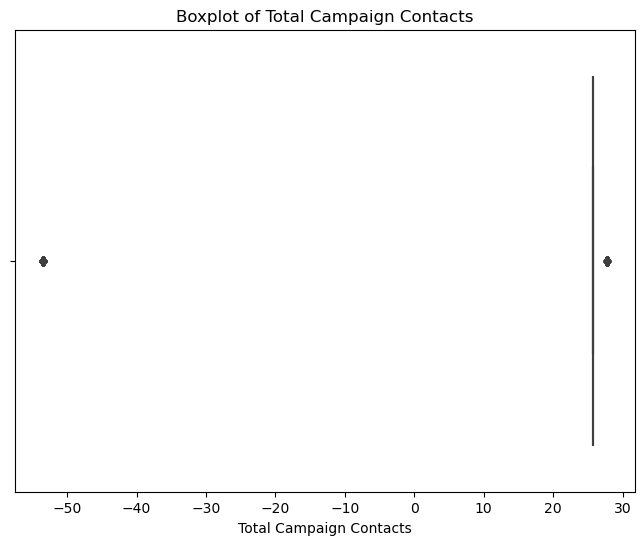

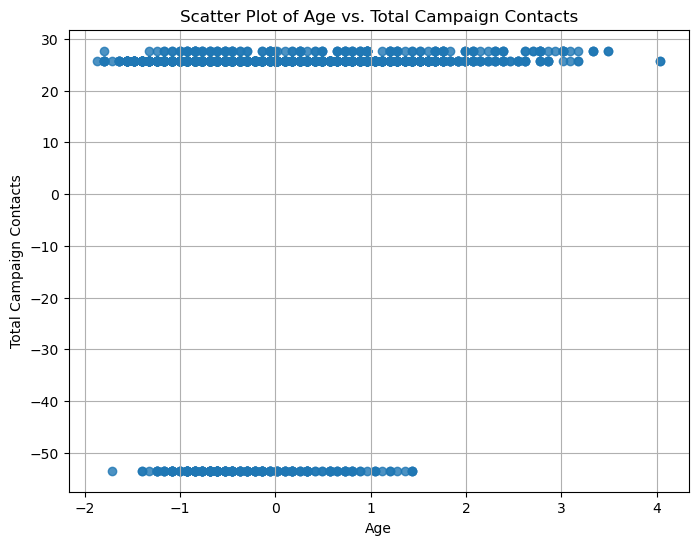

In [210]:
# Create the new feature 'total_campaign_contacts'
data_scaled['total_campaign_contacts'] = data_scaled['campaign'].groupby(data_scaled['contact']).transform('sum')

# Plotting the new feature
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data_scaled['total_campaign_contacts'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Campaign Contacts')
plt.xlabel('Total Campaign Contacts')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_scaled['total_campaign_contacts'])
plt.title('Boxplot of Total Campaign Contacts')
plt.xlabel('Total Campaign Contacts')
plt.show()

# Scatter plot (with another numerical attribute, e.g., age)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled['age'], data_scaled['total_campaign_contacts'], alpha=0.8)
plt.title('Scatter Plot of Age vs. Total Campaign Contacts')
plt.xlabel('Age')
plt.ylabel('Total Campaign Contacts')
plt.grid(True)
plt.show()

The plots depicting the "total_campaign_contacts" feature offer valuable insights into customers' interactions with the bank and their engagement levels during marketing campaigns. The histogram showcases the distribution of total campaign contacts, indicating varying levels of engagement among customers. The boxplot illustrates the spread of contacts, highlighting potential outliers and the overall distribution. Additionally, the scatter plot reveals how total campaign contacts vary across different age groups, potentially reflecting demographic trends in campaign response. Overall, the feature provides a holistic view of customer engagement, capturing the frequency and intensity of interactions with the bank's campaigns. It aids in identifying patterns in campaign response, enabling marketers to tailor strategies effectively based on customer engagement levels and demographics, thus optimizing campaign outcomes and enhancing customer satisfaction.

#### Justification:
- Encoding categorical attributes ensures all features are in numerical format, which is required by most machine learning algorithms.
- Filling missing values ensures completeness of the dataset and prevents potential bias in the analysis.
- Scaling features helps in improving model performance by ensuring all features contribute equally to the model fitting process.
- Handling outliers and skewed distributions ensures robustness of the model by reducing the impact of extreme values and achieving more symmetric distributions.
- Creating new features can provide additional information and capture more complex relationships, potentially improving model performance.

### References

- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
- https://feature-engine.trainindata.com/en/latest/user_guide/creation/CyclicalFeatures.html
- https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
- 